In [75]:
import numpy as np
import pandas as pd
import datatable as dt

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay



In [2]:
data = dt.fread('..\data\diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪,▪
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1


In [4]:
data = data.to_pandas()

In [6]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int32  
 8   Outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int32(6)
memory usage: 30.9 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
# So we have imbalanced dataset
data['Outcome'].value_counts()

False    500
True     268
Name: Outcome, dtype: int64

<Figure size 720x720 with 0 Axes>

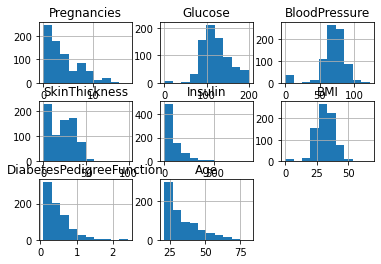

In [13]:
plt.figure(figsize=(10,10))
data.hist()
plt.show()

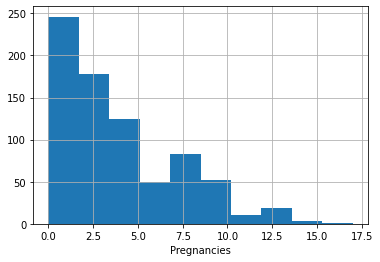

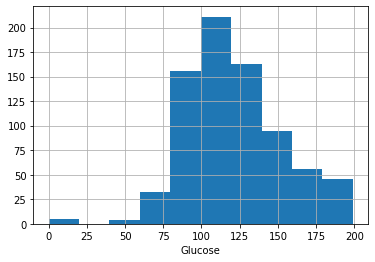

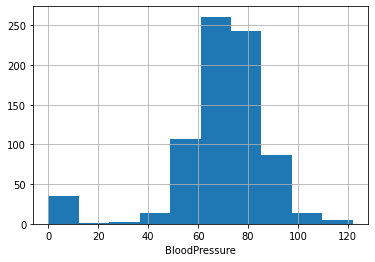

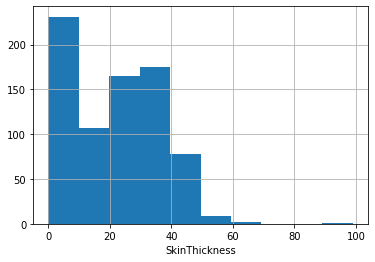

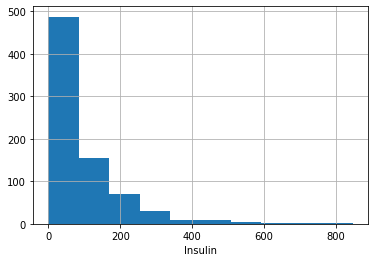

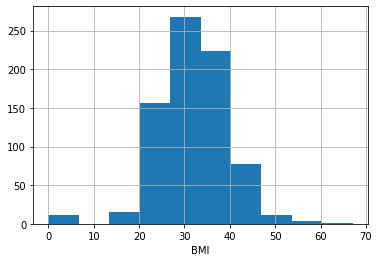

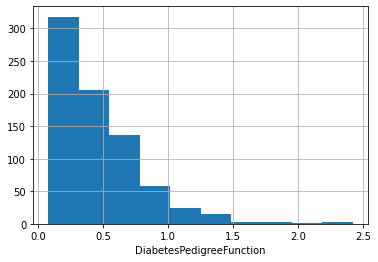

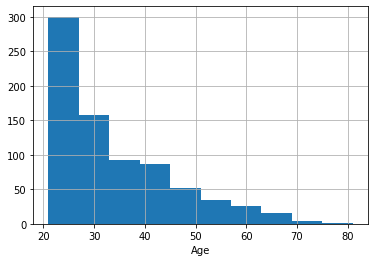

In [24]:
for col in data.columns:
    if col !='Outcome':
        data[col].hist()
        plt.xlabel(col)
        plt.show()

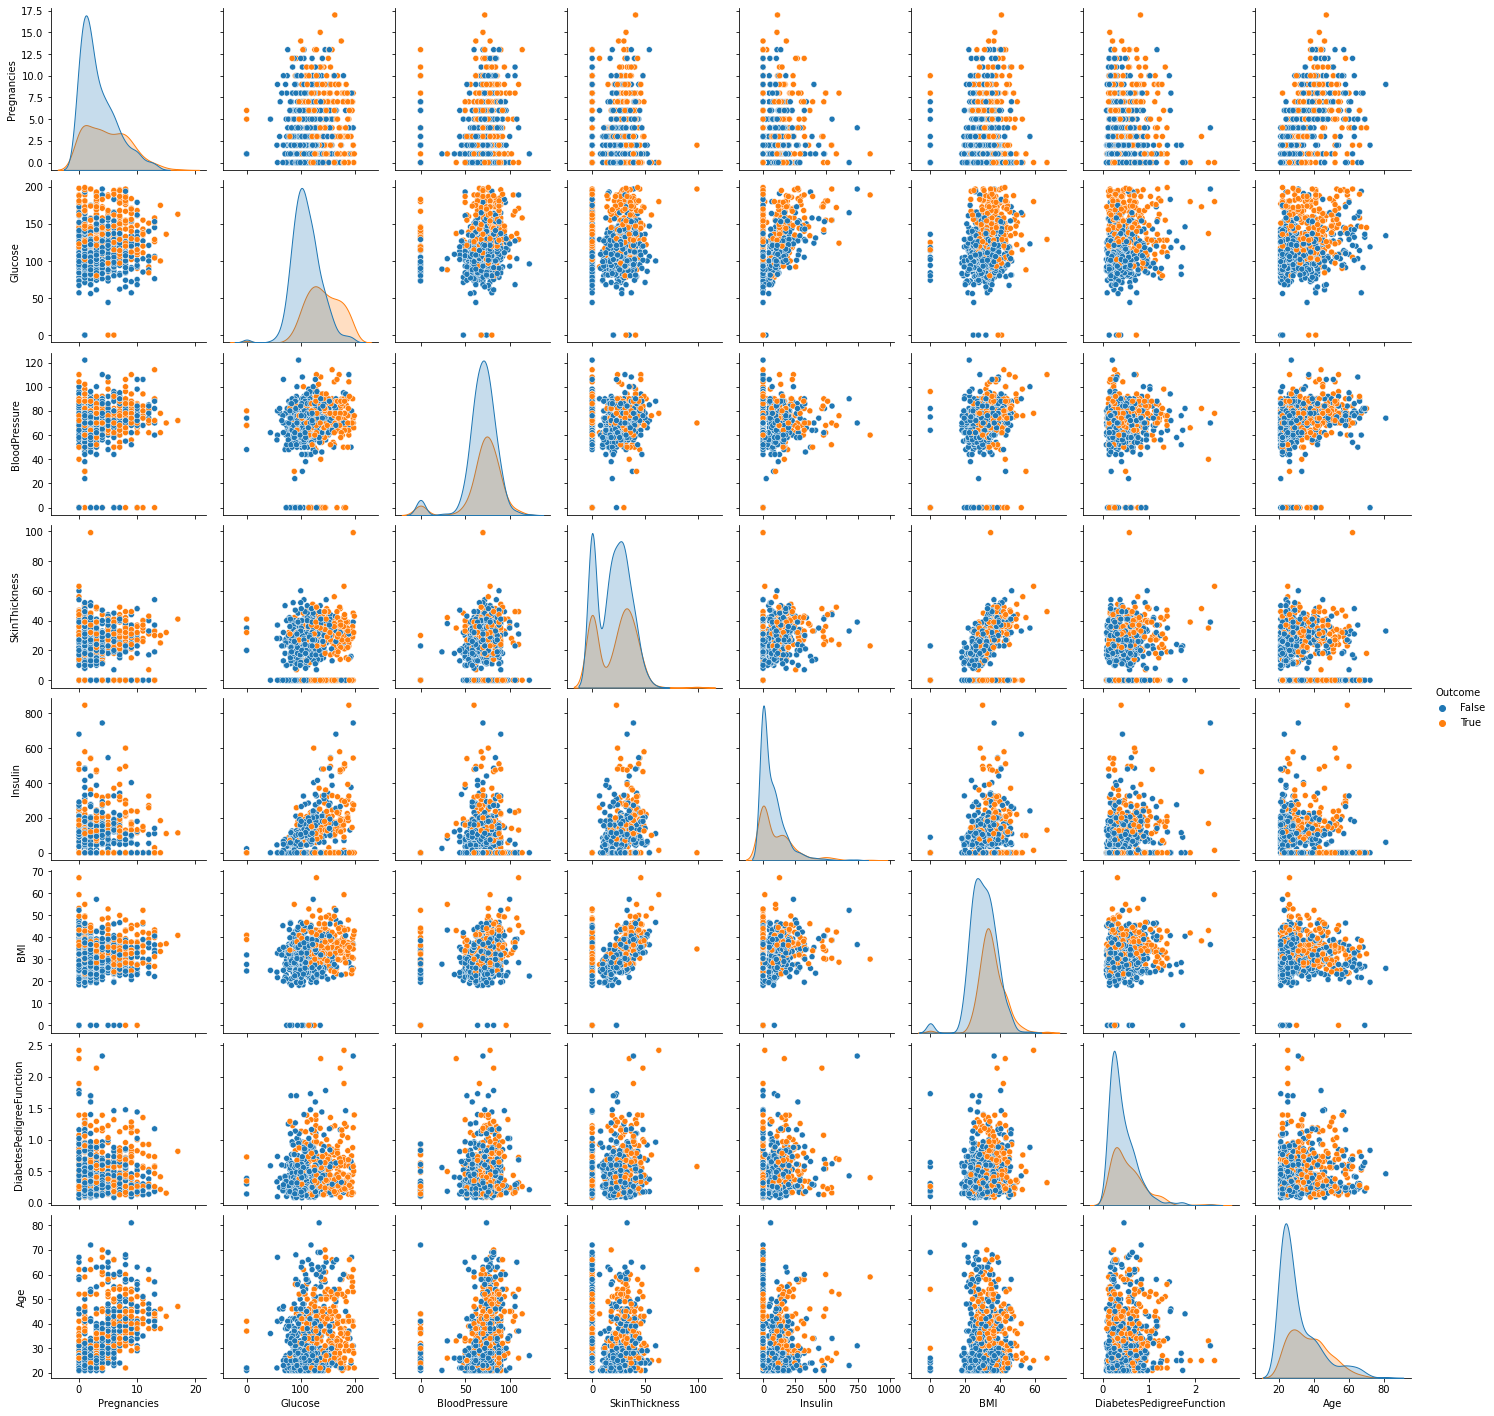

In [53]:
#data.columns.tolist()
sns.pairplot(data = data,hue = 'Outcome', vars = data.select_dtypes(include ='number').columns.tolist())

<AxesSubplot:xlabel='Outcome', ylabel='count'>

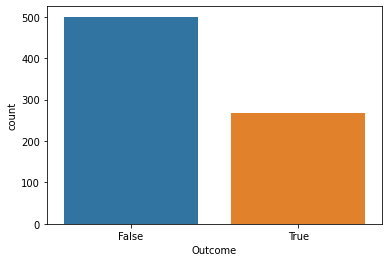

In [55]:
sns.countplot(x = 'Outcome', data= data, label = "Count") 

<AxesSubplot:>

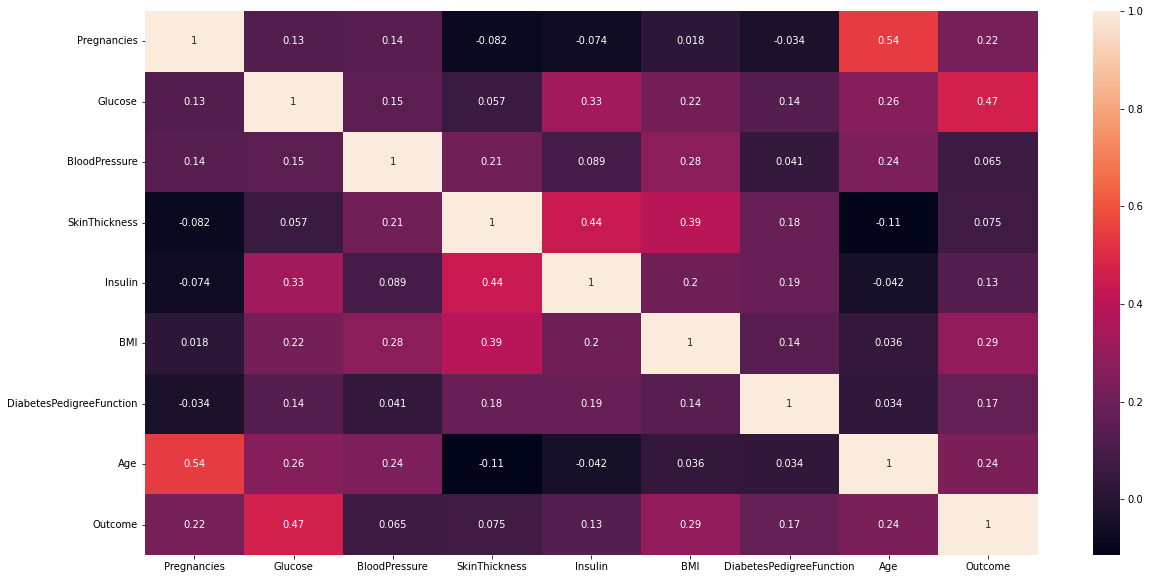

In [57]:
# Let's check the correlation between the variables 

plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True) 

In [25]:
data['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [34]:
for col in data.columns:
    if data[col].nunique() <100:
        print(col)
        print(data[col].nunique())
        print()
        print(data[col].value_counts())
        print()

Pregnancies
17

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

BloodPressure
47

70     57
74     52
78     45
68     45
72     44
       ..
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, Length: 47, dtype: int64

SkinThickness
51

0     227
32     31
30     27
27     23
23     22
     ... 
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, Length: 51, dtype: int64

Age
52

22    72
21    63
25    48
24    46
23    38
      ..
72     1
81     1
64     1
70     1
68     1
Name: Age, Length: 52, dtype: int64

Outcome
2

False    500
True     268
Name: Outcome, dtype: int64



In [35]:
# dividing data into train & test split

X_train, X_test, y_train, y_test = train_test_split(
                        data.drop('Outcome', axis = 1),
                        data['Outcome'],
                        test_size=0.3,
                        random_state=0)

In [37]:
X_train.shape ,X_test.shape

((537, 8), (231, 8))

In [40]:
# Scaling the Train & Test data using standard Scaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [41]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
X_train_scaled.shape

(537, 8)

In [84]:
# Training the Support Vector Machine Classifier model
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

### Model Evaluation

In [85]:
y_predict = svc_model.predict(X_test_scaled)


In [86]:
#cm = confusion_matrix(y_test, y_predict, labels=['Actual Values','Predicted Values'])
#cm

[[139  18]
 [ 38  36]]


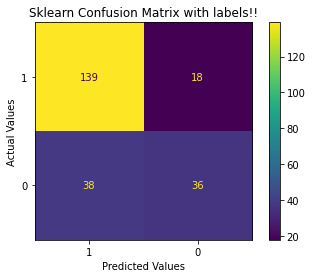

In [87]:
## Create the Confusion Matrix out of the Actual and Predicted Data.
cm = confusion_matrix(y_test, y_predict)
## Print the Confusion Matrix.
print(cm)
## Create the Confusion Matrix Display Object(cmd_obj). Note the 
## alphabetical sorting order of the labels.
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['1', '0'])
## The plot() function has to be called for the sklearn visualization
## code to do its work and the Axes object to be created.
cmd_obj.plot()
## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd_obj.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Values', 
                ylabel='Actual Values')
## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

<AxesSubplot:>

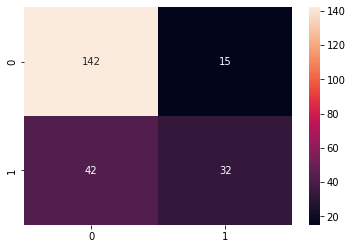

In [69]:
sns.heatmap(cm, annot=True, fmt='d')

In [70]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       False       0.77      0.90      0.83       157
        True       0.68      0.43      0.53        74

    accuracy                           0.75       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231



# Improving the model

In [79]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [80]:
from sklearn.model_selection import GridSearchCV

In [88]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [89]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.639 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.636 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.636 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.645 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.639 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [90]:
grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [91]:
grid.best_estimator_

SVC(C=1, gamma=0.01)

In [92]:
grid_predictions = grid.predict(X_test_scaled)

In [93]:
cm = confusion_matrix(y_test, grid_predictions)
cm

array([[142,  15],
       [ 35,  39]], dtype=int64)

<AxesSubplot:>

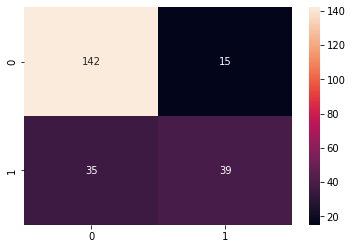

In [95]:
sns.heatmap(cm, annot=True, fmt='d')

In [96]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

       False       0.80      0.90      0.85       157
        True       0.72      0.53      0.61        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



In [100]:
142/(142+15)

0.9044585987261147

In [101]:
39/(39+35)

0.527027027027027

In [102]:
(142/(142+15)+39/(39+35))/2

0.7157428128765708